# scikit-image Functions Accuracy Test

## Group 1 - Ocular Imaging

This notebook features the final iteration of the scikit-image class capable of analysing an image of a retina. This notebook will analyse 30 photos and the percentage success rate of detection of the fovea will be calculated from this.

In [1]:
# IMPORT APPROPRIATE MODULES #
import numpy as np
import matplotlib.pyplot as plt
import os

# SCIKIT-IMAGE #
import skimage
from skimage import data, measure, filters, io
from skimage.color import rgb2gray
from skimage.feature import blob_doh

print(f'scikit version: {skimage.__version__}') # check version number

scikit version: 0.19.2


## scikit-image Class

In [2]:
class scikit_analysis:
    '''
    Retina analysis tool taking advantage of the tools in the scikit-image library.
    Initial inputs:
        -  retina: NumPy array for image of retina (array)
        -  save_plot (optional)
    '''
    def __init__(self, retina, save_plot=False):
        
        retina_bw = rgb2gray(retina) # Convert photo to B&W
        
        # GLOBALISE VARIABLES WITHIN OBJECT #
        self.retina = retina
        self.retina_bw = retina_bw
        self.save_plot = save_plot

        
    def draw_contours(self, level=0.35, figname=False):
        '''
        Function to draw contours around capillaries of the eye.
        Inputs:
            - level (optional): Sensitivity of function to contours found in image, default is 0.35 (float)
            - figname (optional): name of figure if save_plot option is selected (string)
        Outputs:
            - retina_contours: array for contours along with plot 
        '''
        retina_contours = measure.find_contours(self.retina_bw, level, fully_connected='high') # find contours
        
        plt.imshow(self.retina)
        plt.axis('off')
        plt.title('Contours of capillaries visible in the retina')
        
        for contour in retina_contours:
            if len(contour) > len(self.retina_bw)*0.2: # filter out smaller contours
                plt.plot(contour[:, 1], contour[:, 0], linewidth=2) # plot contours
        
        # SAVE PLOT OR SHOW DEPENDING ON USER CHOICE #
        if self.save_plot == True:
            plt.savefig(figname)
            plt.close()
        else:
            plt.show()
        
        return retina_contours
    
    
    def fovea_detect(self, max_sigma=250, threshold=0.001, figname=False):
        
        '''
        Function to detect the fovea using the DoH method.
        Inputs:
            - max_sigma (optional): Max standard deviation for blob_doh() function, default is 250 (float)
            - threshold (optional): Sensitivity of blob_doh() to a blob's intensity, default is 0.001 (float)
            - figname (optional): name of figure if save_plot option is selected (string)
        Outputs:
            - foeva_pos: array for position of fovea and its sigma (rough radius of blob) value (array)
        '''
        fovea_blobs = blob_doh(self.retina_bw, max_sigma=max_sigma, threshold=threshold) # perform detection with B&W retina 
    
        retina_shape = np.shape(self.retina_bw) # resolution of retina photo
        mid = [int(retina_shape[0]/2),int(retina_shape[1]/2)] # midpoint of the photo
        inside_blob = [] # empty array for selected blobs

        # REMOVE BLOBS DETECTED OUTSIDE OF RETINA #
        for blob in fovea_blobs:
            mid_dis = np.sqrt((blob[0]-mid[0])**2 + (blob[1]-mid[1])**2) # calculate distance from centre
            
            if mid_dis < 0.85*min(mid): # only select blobs inside retina (85% to account for black borders)
                inside_blob.append(blob)

        inside_blob = np.array(inside_blob) # turn standard array into numpy array for easier use
        brightness = np.zeros(len(inside_blob)) # empty array

        # FIND BRIGHTNESS AT EVERY SELECTED BLOB #
        for i in range(len(inside_blob)):
            brightness[i] = self.retina_bw[int(inside_blob[i,0]),int(inside_blob[i,1])]
        
        # PICKOUT SPOT OF MINIMUM BRIGHTNESS # 
        fovea_array_pos = np.argmin(brightness)
        fovea_pos = [inside_blob[fovea_array_pos,1],inside_blob[fovea_array_pos,0],inside_blob[fovea_array_pos,2]]

        # PLOT FOVEA ON RETINA #
        plt.imshow(self.retina) # plot retina photo
        plt.scatter(fovea_pos[0],fovea_pos[1],marker='x',s=150) # plot scatter showing detected spot
        plt.axis('off')
        plt.text(0,1480,'Blue "x" marks detected fovea')
        plt.title('Detection of fovea with scikit-image')
        
        # SAVE PLOT OR SHOW DEPENDING ON USER CHOICE #
        if self.save_plot == True:
            plt.savefig(figname)
            plt.close()
        else:
            plt.show()
            
        return fovea_pos

## Test on evaulation dataset 

The final accuracy will be tested on 30 photos from the RFMiD dataset [1].

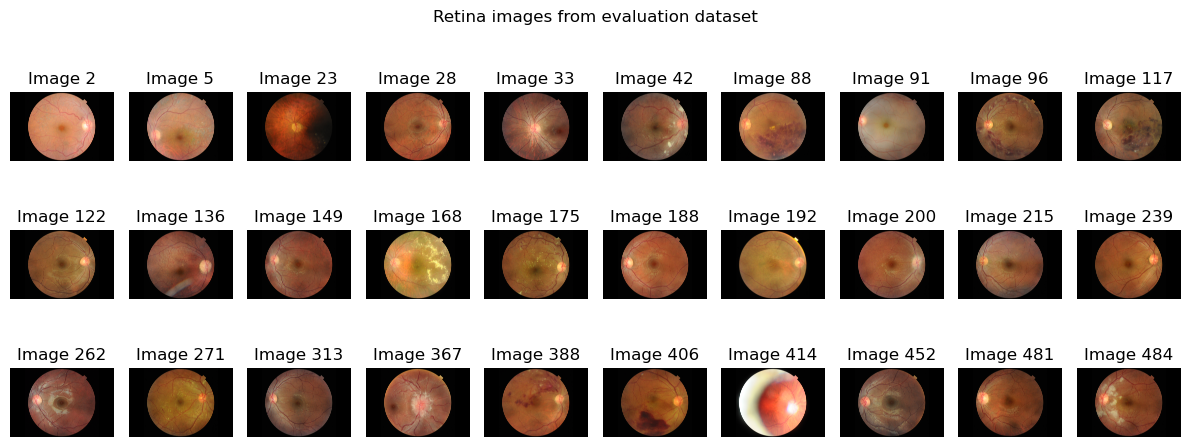

In [3]:
photo_nums = np.array([2,5,23,28,33,42,88,91,96,117,122,136,149,168,175,188,192,200,215,239,262,271,313,367,388,406,414,452,481,484]) #select photo numbers from evaluation datasetretinas = []
retinas = []

# SETUP PLOT & ADD TITLE #
fig = plt.figure(figsize=(12,5),tight_layout=True)
fig.suptitle('Retina images from evaluation dataset')

for i in range(len(photo_nums)):
    
    # IMPORT PHOTOS INTO NOTEBOOK #
    retina_temp = io.imread(f'{photo_nums[i]}.png')
    retinas.append(retina_temp)
    
    # PLOT RETINA, REMOVE AXES & ADD TITLE #
    plt_retina = fig.add_subplot(3,10,i+1)
    plt_retina.imshow(retina_temp)
    plt_retina.axis('off')
    plt_retina.set_title(f'Image {photo_nums[i]}')
    
retinas = np.array(retinas,dtype=object) # turn standard array into numpy array for easier use

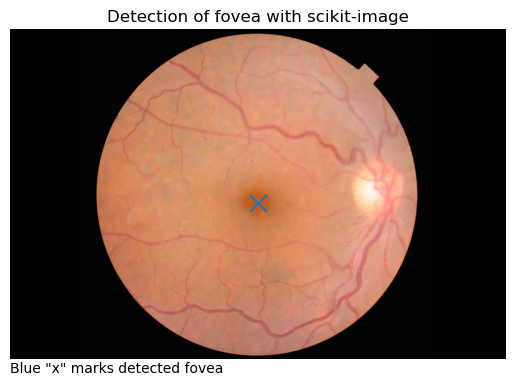

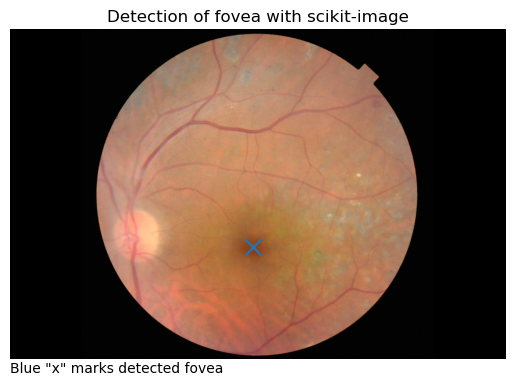

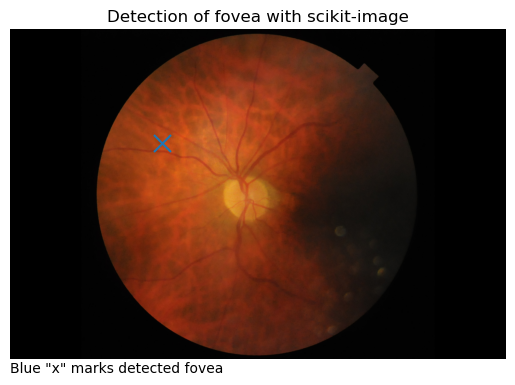

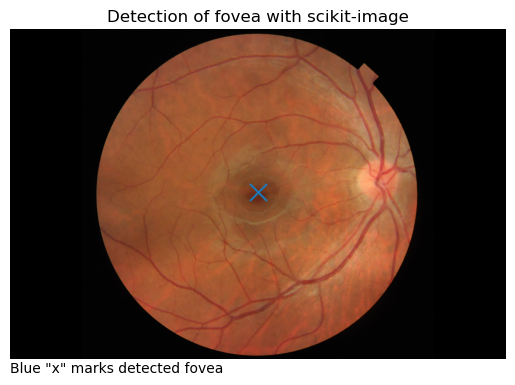

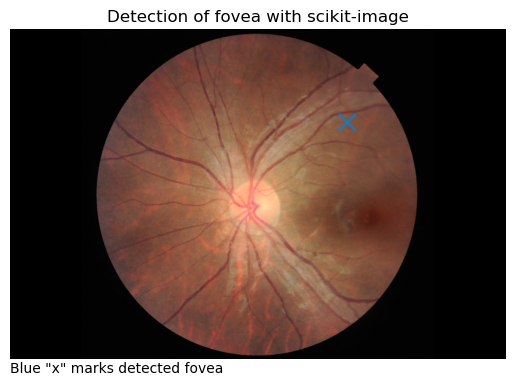

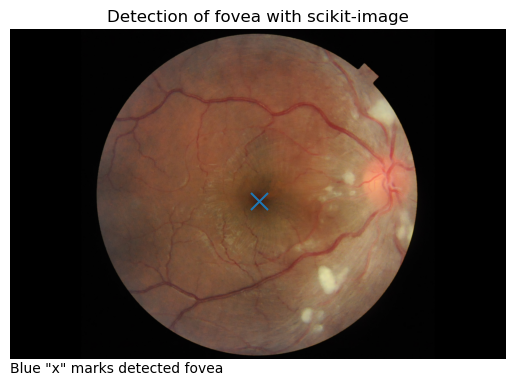

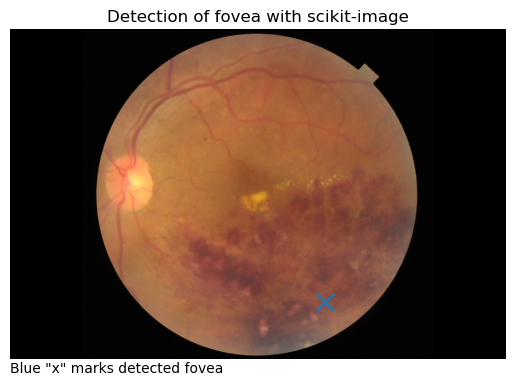

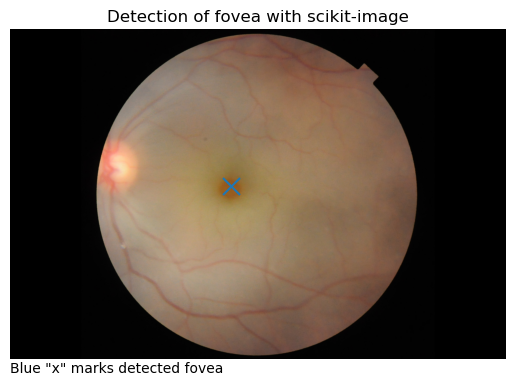

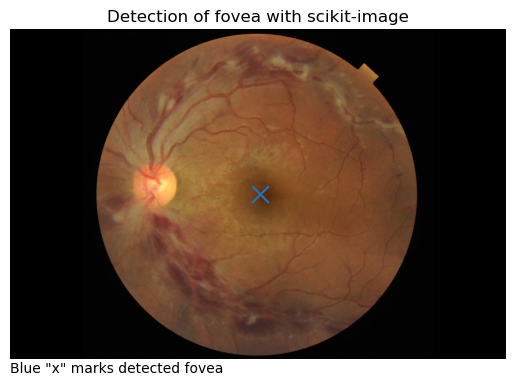

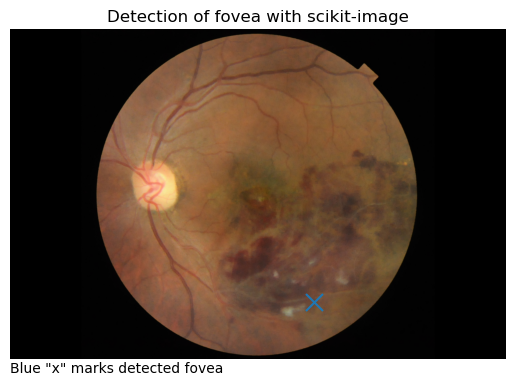

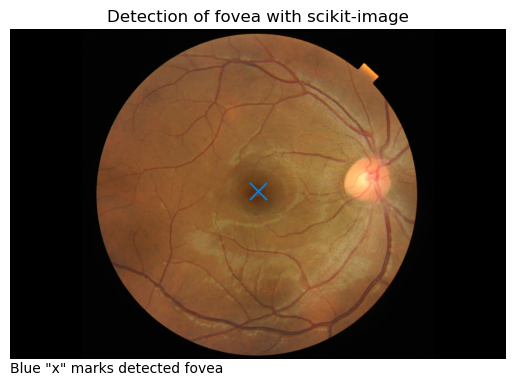

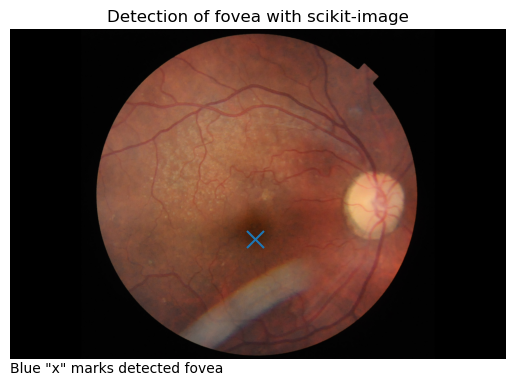

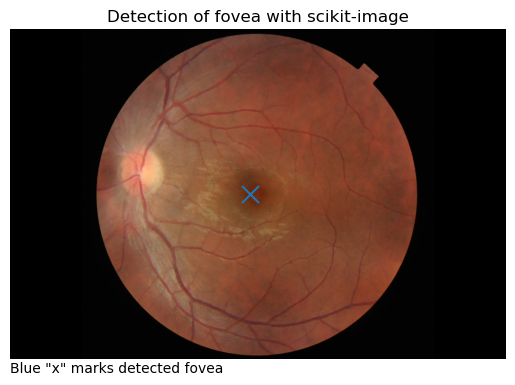

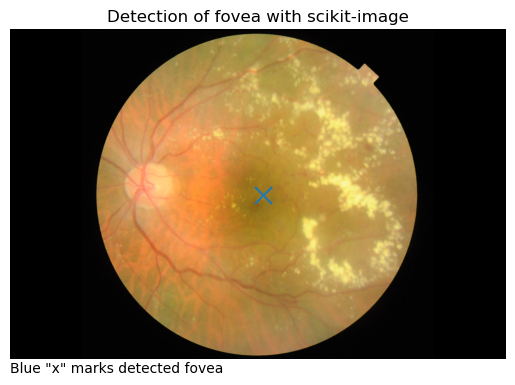

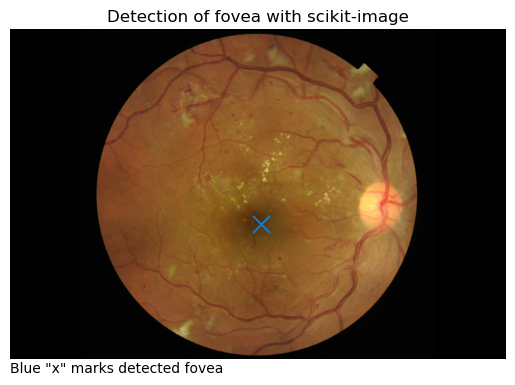

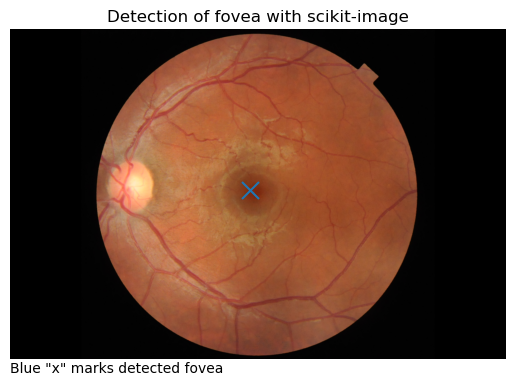

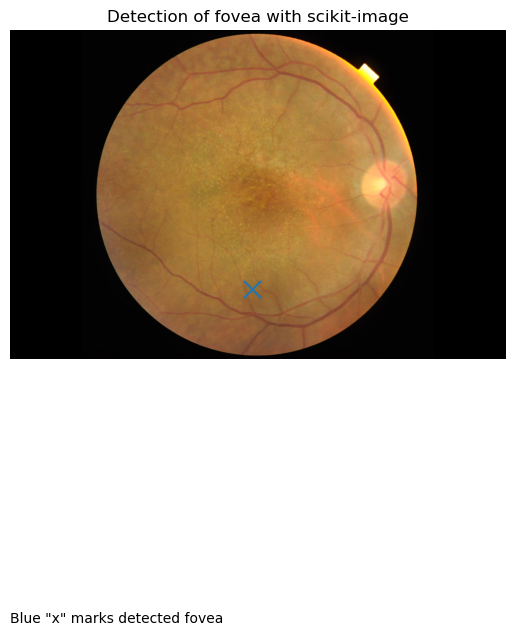

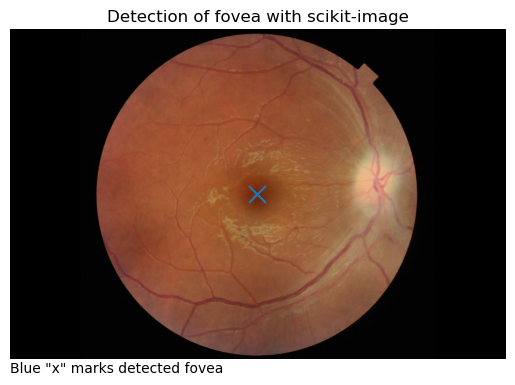

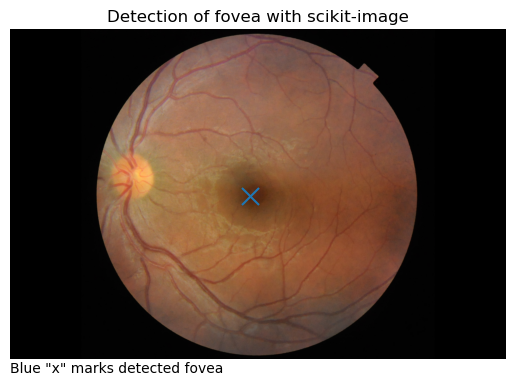

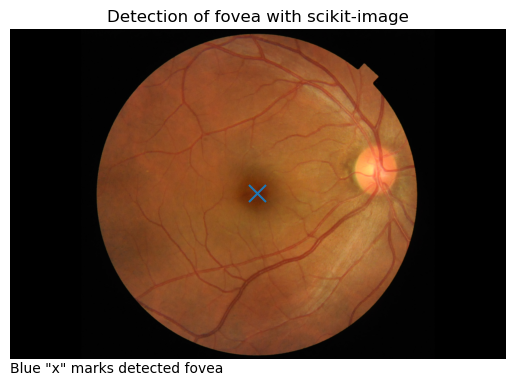

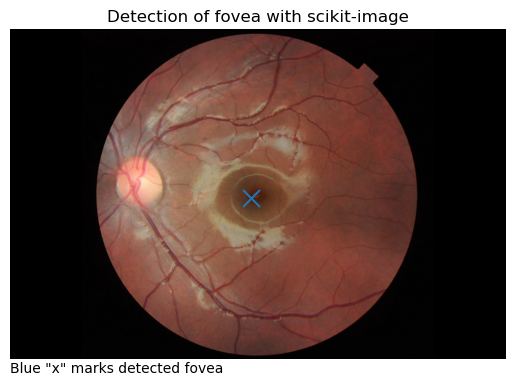

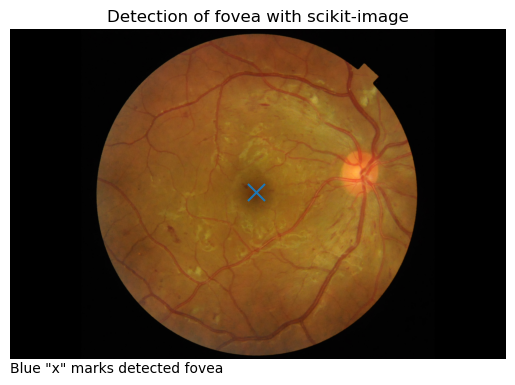

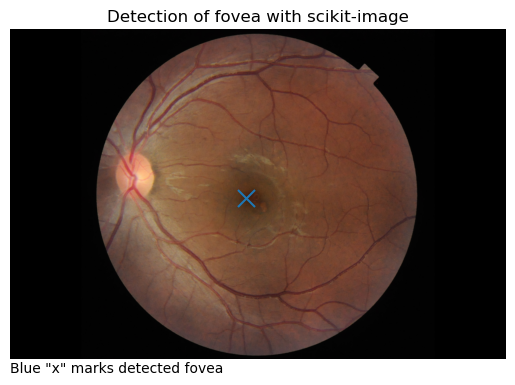

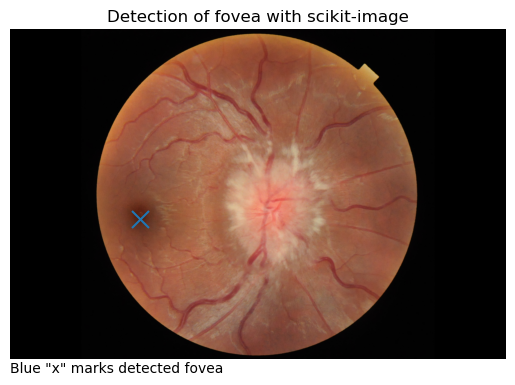

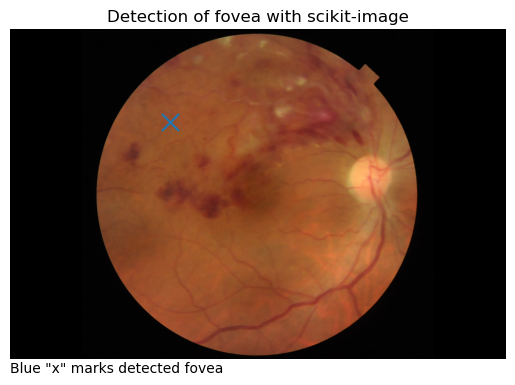

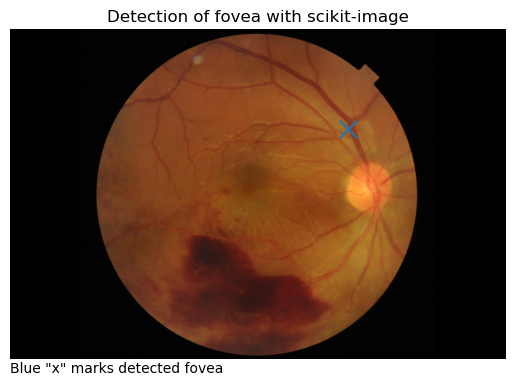

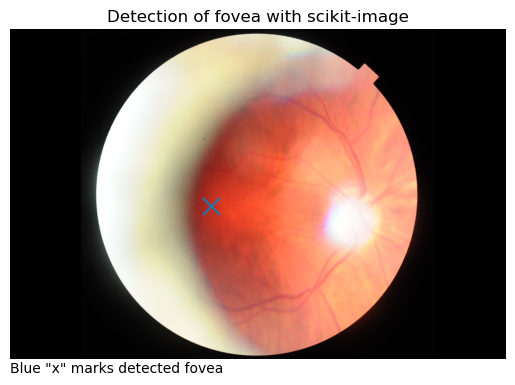

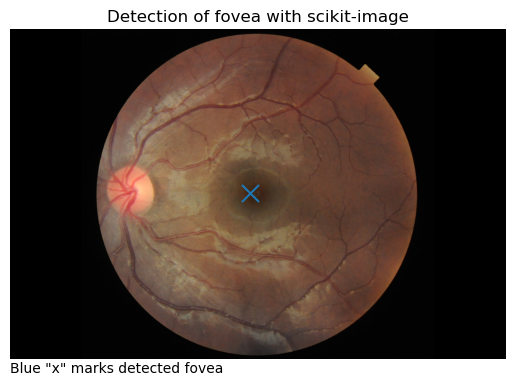

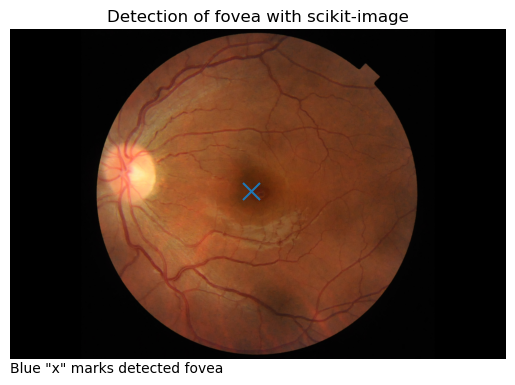

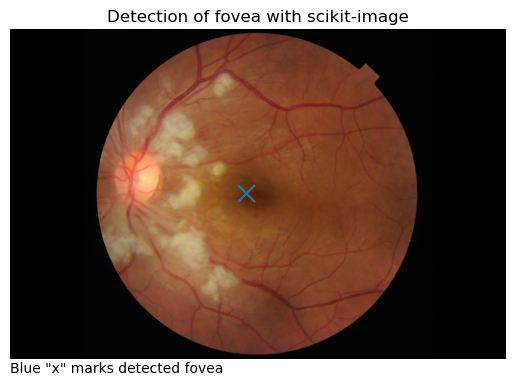

In [4]:
# PERFORM FOVEA DETECTION ON ALL SELECTED IMAGES #
for retina in retinas:
    retina_analysis = scikit_analysis(retina)
    retina_analysis.fovea_detect()

The final accuracy achieved was 22/28, roughly 79%.

### References:

[1] S. Pachade, P. Porwal, D. Thulkar, M. Kokare, G. Deshmukh, V. Sahasrabuddhe, L. Giancardo, G. Quellec and F. Mériaudeau, ‘Retinal fundus multi-disease image dataset (rfmid): A dataset for multi-disease detection research,’ Data, vol. 6, no. 2, p. 14, 2021